In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import my_module as kyd

In [2]:
# Load data and read
# path= '/content/drive/MyDrive/MyProjects/ML Projects/Unsupervised ML/BookRecommendationSystem/data/Books.csv'
path='./data/Books.csv'
df= pd.read_csv(path)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4684\2575485412.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(path)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
# Function displays shape, duplicates count and list of columns
kyd.knowYourData(df)

Shape:  (271360, 8)
Duplicates count:  0
Columns:
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
# Describe
df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [6]:
# Unique
print(df.nunique())

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64


In [7]:
# Unique value for Year-Of-Publication
print(df['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

In [8]:
# Null/ Missing
df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

### Data Descriptions:
1. Shape : (271360,8)
2. Duplicate row count : 0
3. Columns : [ 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L' ]
4. Types of the columns are Object, later we will transform the data type.
5. Unique counts : ISBN -> 271360, Book-Title -> 242135, Book-Author -> 102022, Year-of-Publication -> 202, Publisher -> 16807.
6. There are some textual and 0 values in year columns.

## Preprocessing

In [9]:
cdf= df.copy() # make copy of the df.
cdf['Year-Of-Publication']= cdf['Year-Of-Publication'].apply(lambda x: str(x)) # Change dtype to str.
def yop_analysis(s):
  if (len(s)==4) & (s.isnumeric()):
    return 1
  elif len(s)>4:
    return 2
  else:
    return 0
cdf['yop']= cdf['Year-Of-Publication'].apply(yop_analysis) # Appying the above function

In [10]:
cdf[cdf['yop']==2]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,yop
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,2
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,2
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,2


* In above table, values are not in right columns.
* For yop 0 and 1 we will leave them as it is.

In [11]:
# Correcting index 209538
cdf.loc[209538,'Book-Title']= 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
cdf.loc[209538,'Book-Author']= 'Michael Teitelbaum'
cdf.loc[209538,'Year-Of-Publication']= '2000'
cdf.loc[209538,'Publisher']= 'DK Publishing Inc'
cdf.loc[209538,'Image-URL-L']= df.iloc[209538]['Publisher']
# # Correcting index 220731
cdf.loc[220731,'Book-Title']= "Peuple du ciel, suivi de 'Les Bergers"
cdf.loc[220731,'Book-Author']= 'Jean-Marie Gustave'
cdf.loc[220731,'Year-Of-Publication']= '2003'
cdf.loc[220731,'Publisher']= 'Gallimard'
cdf.loc[220731,'Image-URL-L']= df.iloc[220731]['Publisher']
# # Correcting index 221678
cdf.loc[221678,'Book-Title']= 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
cdf.loc[221678,'Book-Author']= 'James Buckley'
cdf.loc[221678,'Year-Of-Publication']= '2000'
cdf.loc[221678,'Publisher']= 'DK Publishing Inc'
cdf.loc[221678,'Image-URL-L']= df.iloc[221678]['Publisher']

cdf.drop('yop', axis=1, inplace=True)
cdf['Year-Of-Publication']= cdf['Year-Of-Publication'].apply(lambda x: int(x))

In [12]:
# Null/ Missing handling
# cols= ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'] # List to be kept
cdf['Book-Author'].fillna(cdf['Publisher'], inplace=True)
cdf['Publisher'].fillna(cdf['Book-Author'], inplace=True)

In [13]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
top_100_books_with_highest_count= cdf['Book-Title'].value_counts().sort_values(ascending=False).reset_index().head(100)
top_100_books_with_highest_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Book-Title,Selected Poems,Little Women,Wuthering Heights,Dracula,The Secret Garden,Adventures of Huckleberry Finn,Jane Eyre,The Night Before Christmas,Pride and Prejudice,Great Expectations,Masquerade,Frankenstein,Black Beauty,Emma,The Gift,Beloved,Nemesis,Illusions,Psychology,The Wedding,Legacy,The Secret,Journey,Robinson Crusoe,Fahrenheit 451,Dinosaurs,The Promise,Dreamcatcher,The Wind in the Willows,Hannibal,Sacrifice,Heidi,The Hobbit,Carrie,Sense and Sensibility,Best Friends,"Phonics Fun: Reading Program, Pack 4 (Clifford...",King Lear,Mirage,Paradise,When the Wind Blows,Secrets,Matilda,"The Two Towers (The Lord of the Rings, Part 2)",The Edge,Peter Pan,Cinderella,Sisters,Ashes to Ashes,Homecoming,Dolores Claiborne,Anna Karenina,Fall from Grace,Hamlet,Unnatural Causes,Sanctuary,Titan,Animal Farm,Treasure Island,Riptide,On the Road,Flesh and Blood,Lolita,"The Return of the King (The Lord of the Rings,...",Anne of Green Gables,Angel,Payback,Eye of the Beholder,Madame Bovary,Macbeth,The Velveteen Rabbit,Bittersweet,Whispers,Promises,Memoirs,A Tale of Two Cities,Finders Keepers,1984,Dune,Wildfire,Heartbreaker,The Prince,The Fellowship of the Ring (The Lord of the Ri...,Heat,Scarlet Letter,Billy,Time After Time,Exodus,The Odyssey,Angels,Fever,Firebird,The Hound of the Baskervilles,The Hitchhiker's Guide to the Galaxy,No Greater Love,The Scarlet Letter,Second Chance,Temptation,Adventures of Sherlock Holmes,Choices
count,27,24,21,20,20,20,19,18,18,17,16,16,16,15,15,15,14,13,13,13,13,13,13,13,13,12,12,12,12,12,12,12,12,12,12,12,12,11,11,11,11,11,11,11,11,11,11,11,11,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


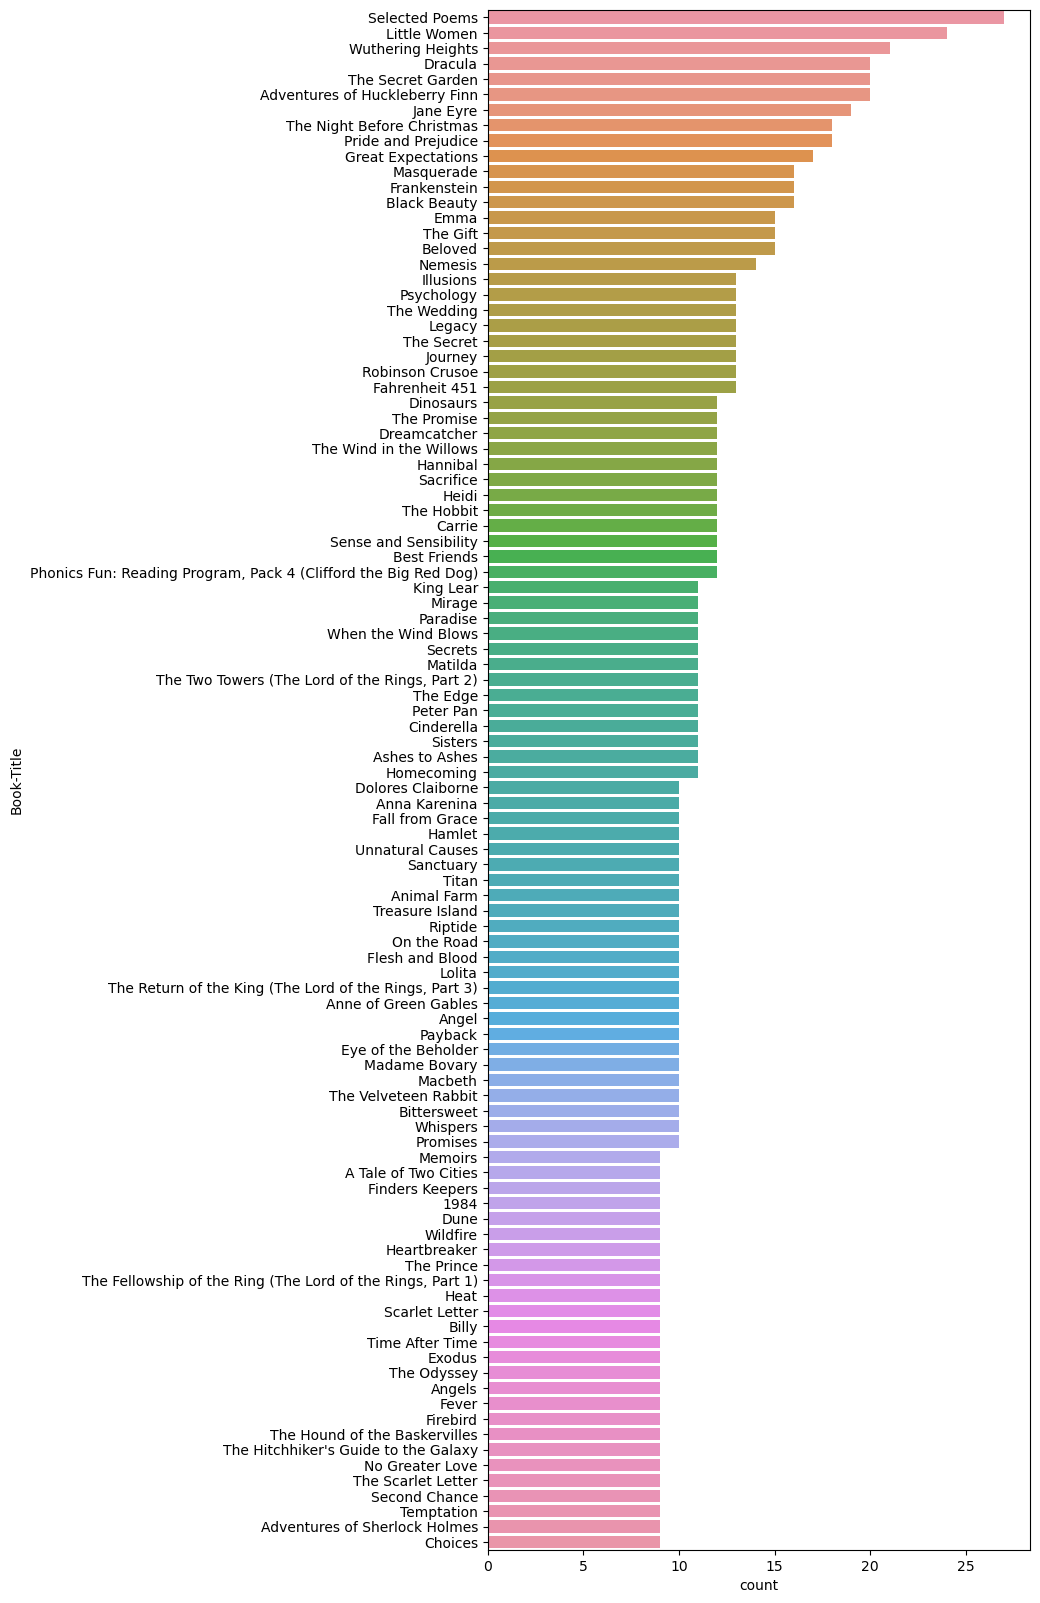

In [14]:
plt.rcParams['figure.figsize']=(7,20)
sns.barplot(top_100_books_with_highest_count, y='Book-Title', x='count', orient='h')
plt.show()

In [15]:
top_100_authors_with_highest_count= cdf['Book-Author'].value_counts().sort_values(ascending=False).reset_index().head(100)
top_100_authors_with_highest_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Book-Author,Agatha Christie,William Shakespeare,Stephen King,Ann M. Martin,Carolyn Keene,Francine Pascal,Isaac Asimov,Nora Roberts,Barbara Cartland,Charles Dickens,Not Applicable (Na ),R. L. Stine,Mark Twain,Jane Austen,Terry Pratchett,Mary Higgins Clark,Piers Anthony,Marion Zimmer Bradley,Janet Dailey,Franklin W. Dixon,Roald Dahl,Tom Clancy,J. R. R. Tolkien,Dick Francis,Danielle Steel,Anne McCaffrey,John Steinbeck,Nathaniel Hawthorne,Fern Michaels,Diana Palmer,Enid Blyton,Don Pendleton,Ed McBain,L. Frank Baum,Andre Norton,Sandra Brown,Stan Berenstain,R.L. Stine,Golden Books,John Grisham,Jayne Ann Krentz,C. S. Lewis,Jim Davis,Robert Ludlum,Oscar Wilde,Henry James,Elmore Leonard,Beatrix Potter,Orson Scott Card,James A. Michener,Robert Louis Stevenson,Alan Dean Foster,Linda Howard,Jack Canfield,Thomas Hardy,Clive Cussler,Louis L'Amour,Barbara Delinsky,Catherine Coulter,Jack London,Anne Rice,Louisa May Alcott,Jude Deveraux,Ken Follett,Ruth Rendell,Ray Bradbury,Robert Silverberg,Beverly Cleary,Lewis Carroll,Robert A. Heinlein,Robin Cook,Rudyard Kipling,Edith Wharton,Margaret Weis,Larry Niven,Lawrence Sanders,Betty Neels,Georges Simenon,Frank Herbert,Edgar Allan Poe,Joseph Conrad,Joyce Carol Oates,James Patterson,Christopher Pike,Jules Verne,Jack Higgins,Ursula K. Le Guin,Ernest Hemingway,Ellis Peters,Author Unknown,Max Lucado,Janette Oke,Lawrence Block,Mercedes Lackey,Cassie Edwards,Dean R. Koontz,V.C. Andrews,Isabel Allende,Fred Saberhagen,Larry McMurtry
count,632,567,524,423,373,372,330,315,307,302,286,282,231,223,220,218,217,216,214,204,195,174,174,174,173,172,172,165,165,164,164,162,151,146,146,145,140,140,138,138,137,136,135,134,133,132,131,131,130,130,130,128,126,125,124,124,123,122,121,121,121,120,120,120,120,120,119,118,118,117,117,117,117,117,116,116,116,115,114,114,111,111,111,110,110,110,110,109,109,107,104,104,104,103,103,103,102,101,101,101


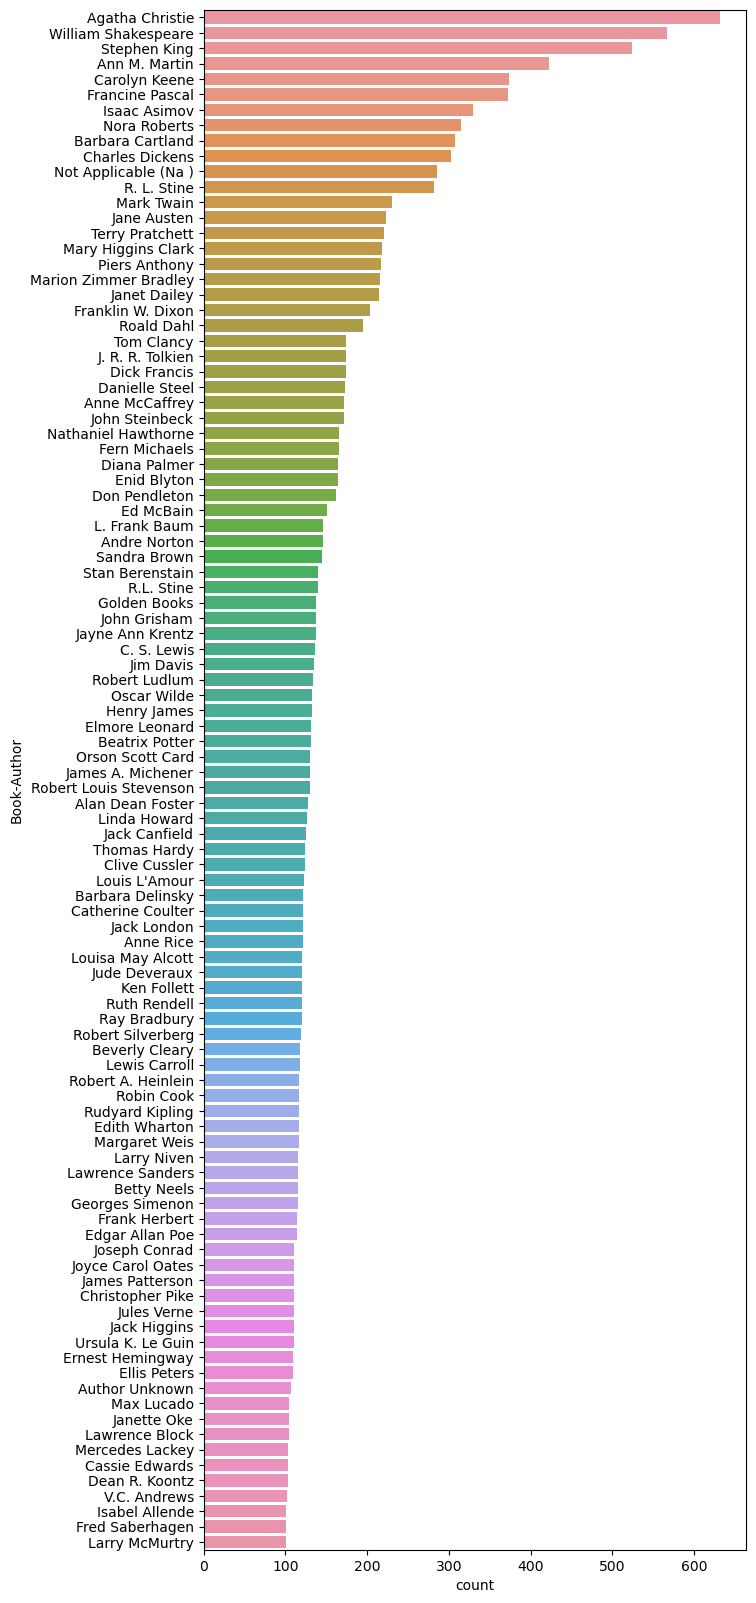

In [16]:
sns.barplot(top_100_authors_with_highest_count, y='Book-Author', x='count', orient='h')
plt.show()

In [17]:
top_100_publishers_with_highest_count= cdf['Publisher'].value_counts().sort_values(ascending=False).reset_index().head(100)
top_100_publishers_with_highest_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Publisher,Harlequin,Silhouette,Pocket,Ballantine Books,Bantam Books,Scholastic,Simon &amp; Schuster,Penguin Books,Berkley Publishing Group,Warner Books,Penguin USA,Harpercollins,Fawcett Books,Signet Book,Random House Inc,St Martins Pr,St. Martin's Press,Tor Books,HarperCollins Publishers,Zebra Books,Bantam,Avon,Jove Books,Vintage Books USA,Oxford University Press,Dell Publishing Company,Ace Books,Harper Mass Market Paperbacks (Mm),Bantam Dell Pub Group,Perennial,Goldmann,Dover Publications,Leisure Books,Puffin Books,Del Rey Books,Golden Books,Scribner,Trafalgar Square,Aladdin,HarperTrophy,Heyne,Putnam Pub Group,Penguin Books Ltd,Gallimard,HarperCollins,Kensington Publishing Corporation,Pub Group West,Avon Books,Pinnacle Books,Random House Children's Books,Berkley Pub Group,W. W. Norton &amp; Company,Simon Pulse,Baen,Scholastic Paperbacks (Mm),Plume Books,Random House,Prentice Hall,HarperTorch,Pocket Books,Yearling Books,Alfred A. Knopf,New Amer Library (Mm),Harcourt,Houghton Mifflin,LÃ?Â¼bbe,Not Avail,Ivy Books,Random House Childrens Books,Troll Communications,"Little, Brown",St. Martin's Minotaur,Mira,Rowohlt Tb.,Dtv,Harpercollins Juvenile Books,Putnam Publishing Group,Little Brown &amp; Co,Doubleday Books,Star Trek,Andrews McMeel Publishing,Bantam Doubleday Dell,Fireside,Kensington Pub Corp (Mm),Dell,Pan Macmillan,McGraw-Hill,LGF,Scholastic Paperbacks,Viking Books,HarperSanFrancisco,Harvest Books,Houghton Mifflin Company,Daw Books,New Amer Library,Tor Books (Mm),Bethany House Publishers,Wizards of the Coast,William Morrow &amp; Company,Worldwide Library
count,7535,4220,3905,3783,3646,3160,2971,2844,2771,2727,2717,2525,2258,2070,2045,1953,1783,1704,1700,1694,1660,1566,1553,1538,1502,1473,1466,1450,1322,1257,1127,1107,1099,1081,1080,1026,1004,939,932,907,898,869,863,850,845,822,807,787,758,755,750,739,735,726,723,715,713,713,704,690,685,681,676,673,672,666,646,640,635,626,626,623,622,618,600,597,588,586,582,578,567,567,565,550,548,546,538,537,537,533,531,527,525,513,512,503,498,491,468,466


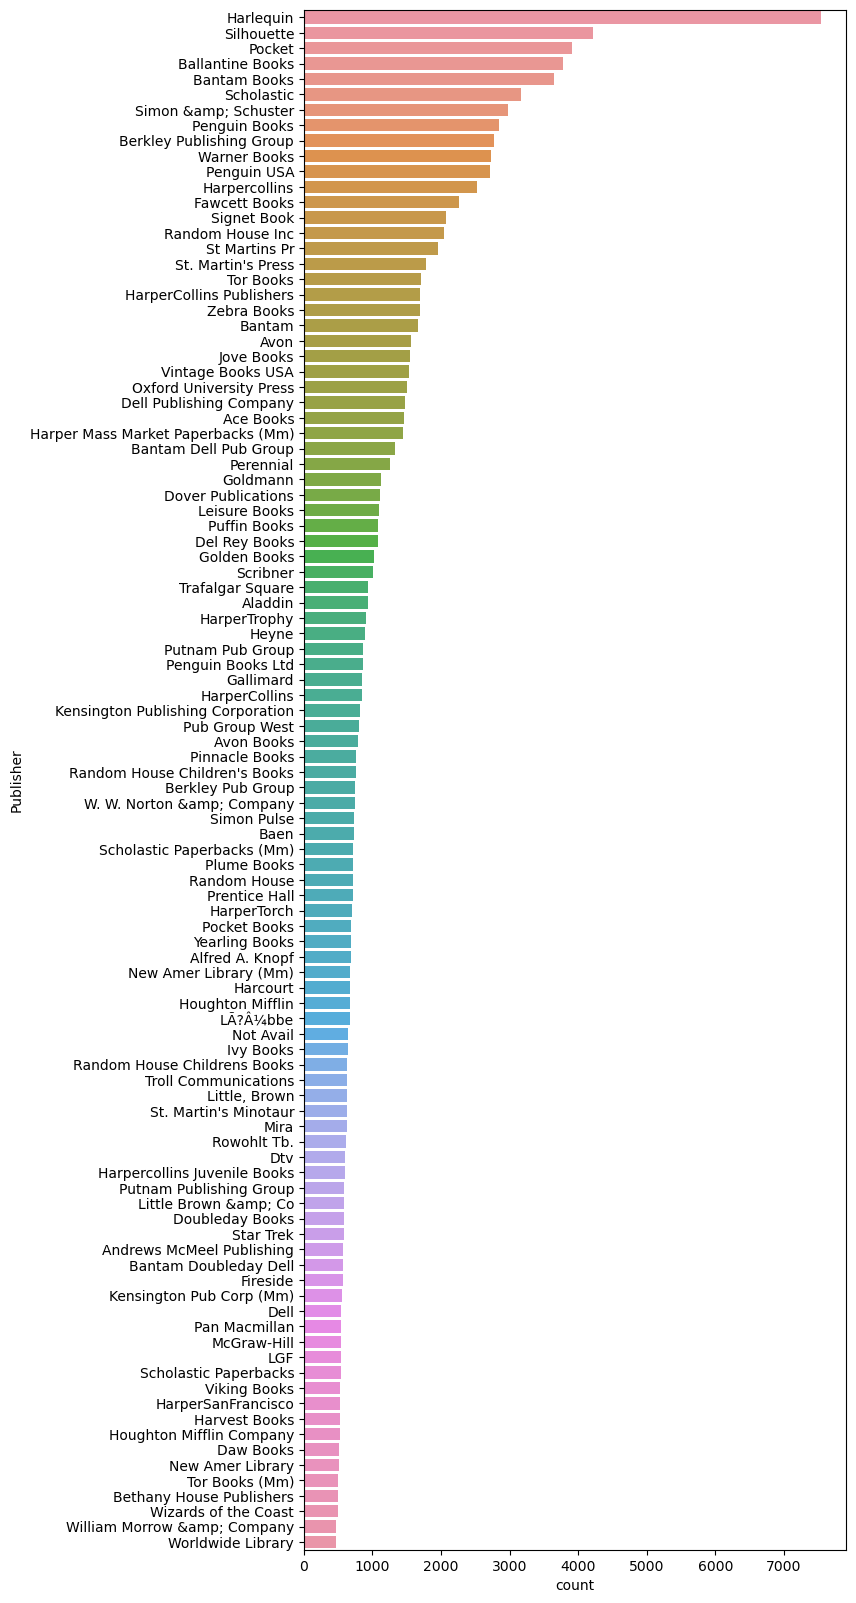

In [18]:
sns.barplot(top_100_publishers_with_highest_count, y='Publisher', x='count', orient='h')
plt.show()

In [19]:
top_100_publication_year_with_highest_count= cdf['Year-Of-Publication'].value_counts().sort_values(ascending=False).reset_index()
top_100_publication_year_with_highest_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
Year-Of-Publication,2002,1999,2001,2000,1998,1997,2003,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,2004,1985,1984,0,1983,1982,1981,1980,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968,1966,1967,1965,1964,1960,1961,1963,1962,1959,1958,1957,1956,1955,1953,1954,2005,1951,1940,1952,1920,1950,1911,1947,1942,1930,1946,1949,1923,1941,1948,1939,1943,1945,2030,1929,1936,1901,1938,1937,1932,1933,1944,1900,2006,2020,1935,1931,1924,2011,1928,2050,1927,1921,1925,1902,1922,2010,1926,1909,1806,1904,1914,1934,1910,2038,1917,1908,1906,2026,2021,1919,1897,2012,1378,1376,2024,2008,2037
count,17627,17431,17359,17234,15766,14890,14359,14030,13546,11796,10602,9906,9389,8660,7936,7492,6529,5841,5839,5343,4986,4618,4499,4197,3279,2676,2208,2131,1897,1597,1219,1023,923,772,540,459,339,233,183,176,173,149,133,132,132,123,103,77,76,74,70,63,54,46,40,36,34,33,32,19,14,14,13,13,11,11,10,9,9,8,8,7,7,7,7,7,5,5,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


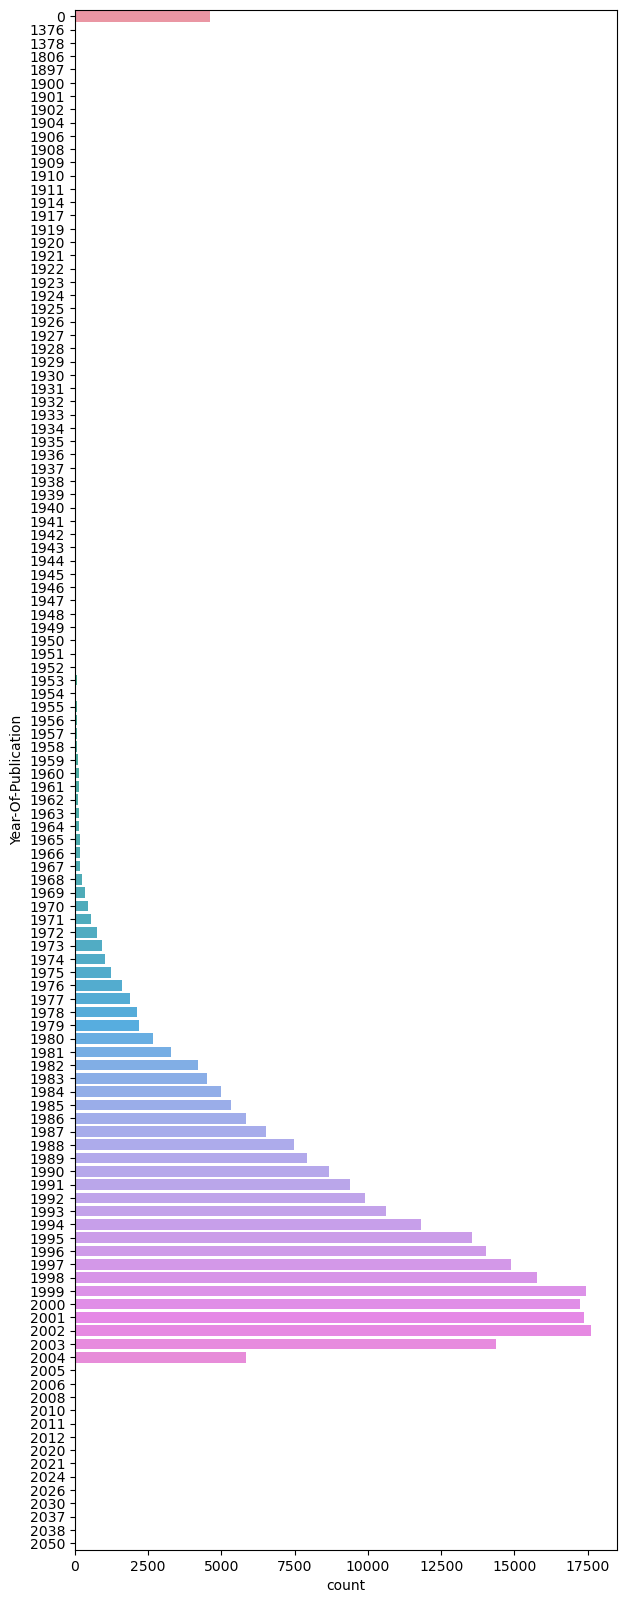

In [20]:
sns.barplot(top_100_publication_year_with_highest_count, y='Year-Of-Publication', x='count', orient='h')
plt.show()

#### Insights after Performing EDA
1. Top Books by count : Selected Poems
2. Top Authors by highest book count : Agatha Christie
3. Top Publisher by highest book count : Harlequin
4. Top Year with highest book count : 2002
5. There are few books from future.

In [22]:
cdf.to_csv('./preprocessed_data/preprocessed_book.csv')